In [2]:
import sys
import os
from pathlib import Path

sys.path.append(Path.cwd().parent.joinpath("source").as_posix())

from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen
from PIL import Image
import mvalab
import utils
import random
random.seed(1)

def read_tiff(chemin):
    dataset = gdal.Open(chemin)
    for x in range(1, dataset.RasterCount + 1):
        band = dataset.GetRasterBand(x)
        array = band.ReadAsArray()
    return array.astype(np.float64)

def plot_sar(ima):
    plt.figure(figsize=(12,12))
    t = np.mean(ima)+3*np.std(ima)
    plt.imshow(np.clip(ima,0,t),cmap='gray')
    plt.show()

def save_tiff(img, dir, path):
    im = Image.fromarray(img)
    save_path = os.path.join(dir, path)
    print(f"Saving image at {save_path}")
    im.save(save_path)

In [4]:
storage_processed = "/mnt/SAR_images/processed/18MUU/"
crop_sar = True
ignore_existing = True

if crop_sar:
    if "cropped" not in os.listdir(storage_processed):
        os.mkdir(os.path.join(storage_processed, "cropped"))


    for path in os.listdir(storage_processed) :
        if os.path.exists(os.path.join(storage_processed, "cropped", path)) and ignore_existing:
            continue

        if 'tif' in path:
            img = read_tiff(os.path.join(storage_processed, path))
            save_tiff(img[2000:2500, 5700:6300], os.path.join(storage_processed, "cropped"), path)


Saving image at /mnt/SAR_images/processed/18MUU/cropped/20210321ASC.tif
Saving image at /mnt/SAR_images/processed/18MUU/cropped/20210111ASC.tif
Saving image at /mnt/SAR_images/processed/18MUU/cropped/20190601ASC.tif
Saving image at /mnt/SAR_images/processed/18MUU/cropped/20200401ASC.tif
Saving image at /mnt/SAR_images/processed/18MUU/cropped/20150101ASC.tif
Saving image at /mnt/SAR_images/processed/18MUU/cropped/20201021ASC.tif
Saving image at /mnt/SAR_images/processed/18MUU/cropped/20200211ASC.tif
Saving image at /mnt/SAR_images/processed/18MUU/cropped/20210701ASC.tif
Saving image at /mnt/SAR_images/processed/18MUU/cropped/20160821ASC.tif
Saving image at /mnt/SAR_images/processed/18MUU/cropped/20201211ASC.tif
Saving image at /mnt/SAR_images/processed/18MUU/cropped/20170614DES.tif
Saving image at /mnt/SAR_images/processed/18MUU/cropped/20180209DES.tif
Saving image at /mnt/SAR_images/processed/18MUU/cropped/20200301ASC.tif
Saving image at /mnt/SAR_images/processed/18MUU/cropped/20150901

T18MUU_20180921T152629_B03.jp2
Affichage d'une image reelle
plt.show dans visusar : image 600 x 500


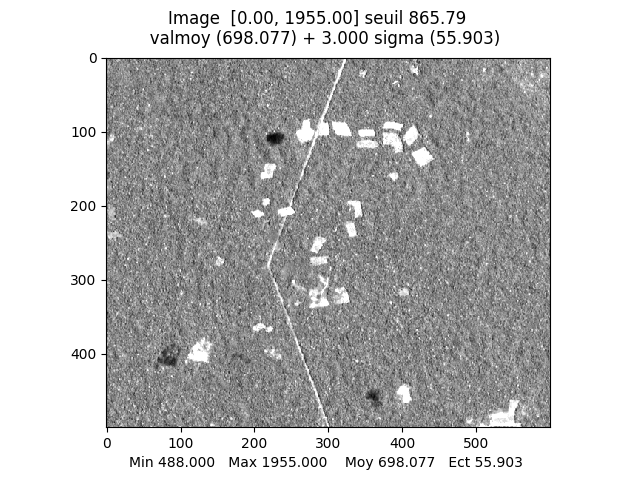

T18MUU_20170901T152641_B03.jp2
Affichage d'une image reelle
plt.show dans visusar : image 600 x 500


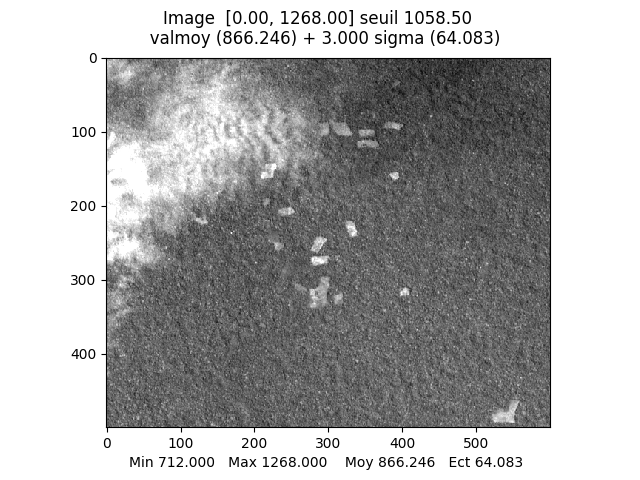

T18MUU_20210806T152639_B03.jp2
Affichage d'une image reelle
plt.show dans visusar : image 600 x 500


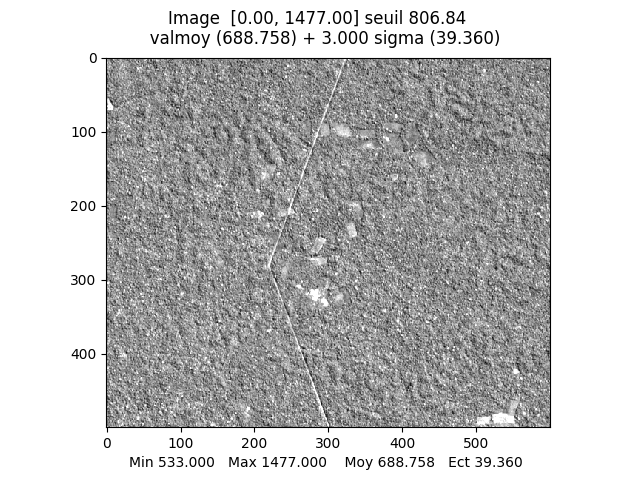

T18MUU_20160310T152622_B03.jp2
Affichage d'une image reelle
plt.show dans visusar : image 600 x 500


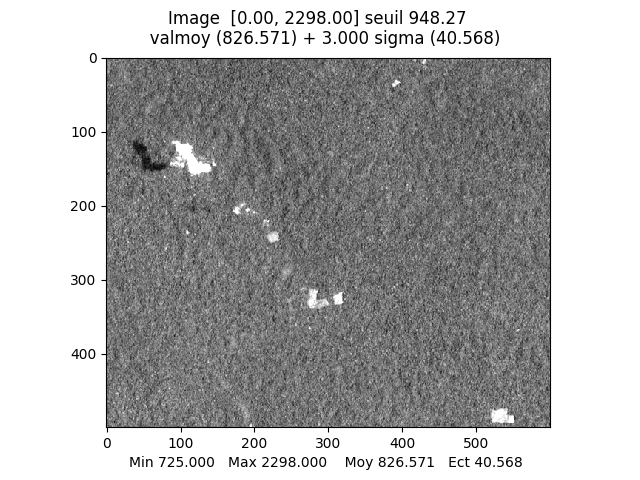

T18MUU_20200811T152639_B03.jp2
Affichage d'une image reelle
plt.show dans visusar : image 600 x 500


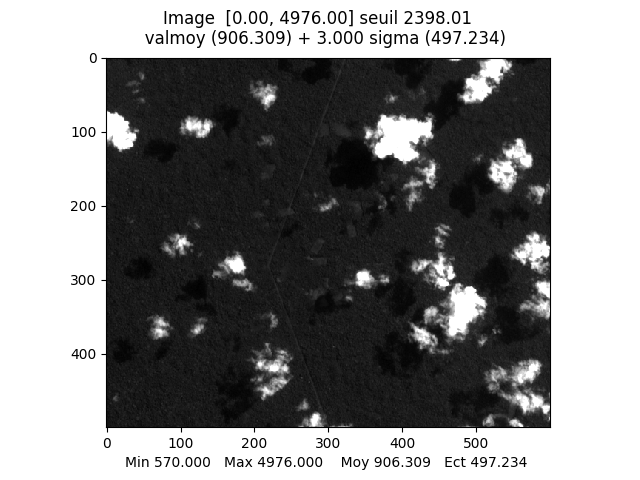

In [9]:
crop_color = True
%matplotlib widget
color_folder = "/mnt/SAR_images/couleur/"
if crop_color:
    cropped_path = os.path.join(color_folder, 'cropped')
    if not os.path.exists(cropped_path):
        os.mkdir(cropped_path)
    
    for path in filter(lambda p: 'SAFE' in p, os.listdir(color_folder)):
        granule_path = os.path.join(color_folder, path, "GRANULE")
        IMG_DATA_path = os.path.join(granule_path,os.listdir(granule_path)[0], "IMG_DATA")
        img_name = list(filter(lambda p: 'B03' in p, os.listdir(IMG_DATA_path)))[0]
        full_path = os.path.join(IMG_DATA_path, img_name)
        
        #  /L1C_T18MUU_A003740_20160310T152711/IMG_DATA/T18MUU_20160310T152622_B03.jp2"
        img = read_tiff(full_path)
        # save_tiff(img[2000:2500, 5700:6300], cropped_path, img_name[:-4] + "_cropped.tiff")
        print(img_name)
        mvalab.visusar(img[2000:2500, 5700:6300])
        # plt.show()

Affichage d'une image reelle
plt.show dans visusar : image 600 x 500


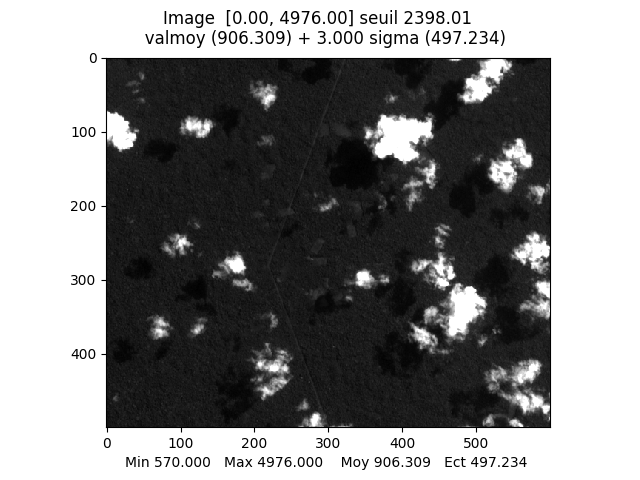

array([[785., 746., 727., ..., 763., 785., 772.],
       [781., 766., 745., ..., 769., 766., 716.],
       [762., 776., 790., ..., 762., 737., 675.],
       ...,
       [747., 725., 705., ..., 805., 764., 773.],
       [751., 766., 723., ..., 822., 790., 811.],
       [739., 773., 736., ..., 847., 780., 813.]])

In [10]:
mvalab.visusar(img[2000:2500, 5700:6300])